In [1]:
%pylab inline
from app.analysis import Quote
bonds = Quote.screen_funds('Bonds', 'Domestic', 'Government', 'Long-Term')
equities = Quote.screen_funds('Equities', 'Domestic', 'Large-Cap', 'Growth')
print(len(bonds), len(equities))
quote = Quote(bonds + equities + ['TMF', 'SPXL'], 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
6 16
from 2019-01-29 to 2019-07-29 - 24


In [2]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

24


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
SPXL,122,0.276805,0.897176,0.299683,47.007152,19.502869
TMF,122,0.198632,0.730523,0.261040,27.931288,9.129596
QQQ,122,0.135168,0.399602,0.318395,20.941554,10.983212
VUG,122,0.133066,0.337026,0.371276,20.357438,8.023383
MGK,122,0.132843,0.346129,0.360867,20.528618,8.647441
MTUM,122,0.128557,0.274810,0.438923,19.588806,2.859384
VONG,122,0.126900,0.338401,0.351545,19.411294,7.928632
IWF,122,0.126596,0.337609,0.351471,19.453921,7.883790
IWY,122,0.125596,0.340789,0.345256,19.390292,8.194247


evicted MTUM 0.897 -0.226
retry backlogs ['MGK', 'TLT', 'IWY', 'QQQ', 'IEF', 'IVW', 'VOOG', 'JKE', 'IWF', 'SPYG', 'TMF', 'SPTL', 'EDV', 'VGLT', 'VONG', 'FV', 'SCHG', 'ONEQ', 'SPXL', 'RPG', 'IUSG'] at 0.905/-0.51 - 0.686
retry backlogs ['MGK', 'TLT', 'IWY', 'QQQ', 'IEF', 'IVW', 'VOOG', 'JKE', 'IWF', 'SPYG', 'TMF', 'SPTL', 'EDV', 'VGLT', 'VONG', 'FV', 'SCHG', 'ONEQ', 'SPXL', 'RPG', 'IUSG'] at 0.910/-0.52 - 0.686
retry backlogs ['MGK', 'TLT', 'IWY', 'QQQ', 'IEF', 'IVW', 'VOOG', 'JKE', 'IWF', 'SPYG', 'TMF', 'SPTL', 'EDV', 'VGLT', 'VONG', 'FV', 'SCHG', 'ONEQ', 'SPXL', 'RPG', 'IUSG'] at 0.915/-0.53 - 0.686
retry backlogs ['MGK', 'TLT', 'IWY', 'QQQ', 'IEF', 'IVW', 'VOOG', 'JKE', 'IWF', 'SPYG', 'TMF', 'SPTL', 'EDV', 'VGLT', 'VONG', 'FV', 'SCHG', 'ONEQ', 'SPXL', 'RPG', 'IUSG'] at 0.920/-0.54 - 0.686
retry backlogs ['MGK', 'TLT', 'IWY', 'QQQ', 'IEF', 'IVW', 'VOOG', 'JKE', 'IWF', 'SPYG', 'TMF', 'SPTL', 'EDV', 'VGLT', 'VONG', 'FV', 'SCHG', 'ONEQ', 'SPXL', 'RPG', 'IUSG'] at 0.925/-0.55 - 0.686
retr

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.070984,0.091576,-0.144181,0.007363,0.058191,0.129418,0.289245,0.688472,9.938644,0.769146
VUG,122.0,0.133066,0.337026,-0.953352,-0.058297,0.132325,0.331023,1.248317,0.371276,20.357438,8.023383
IEF,122.0,0.048626,0.116442,-0.248067,-0.029800,0.036674,0.120632,0.382150,0.349444,6.409923,1.474038


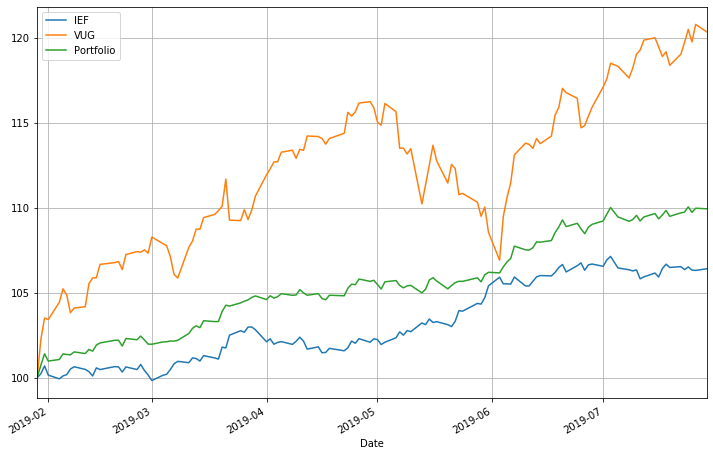

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(max_count=2)
quote.setup_mask(['SPTL', 'VONG'])
sd.update(quote.optimize_portfolio(max_count=2))
quote.setup_mask(['TLH', 'MTUM'])
sd.update(quote.optimize_portfolio(max_count=2))
quote.setup_mask(['TMF', 'SPXL'])
sd.update(quote.optimize_portfolio(max_count=2))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(max_count=2))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.090781,0.133602,-0.247941,0.002007,0.099972,0.176888,0.479208,0.620080,12.980830,1.491453
MTUM,122.0,0.128557,0.274810,-0.476787,-0.025820,0.096362,0.279315,1.172438,0.438923,19.588806,2.859384
TLH,122.0,0.062422,0.167038,-0.399220,-0.032759,0.046549,0.151294,0.533710,0.326184,8.254371,2.264968


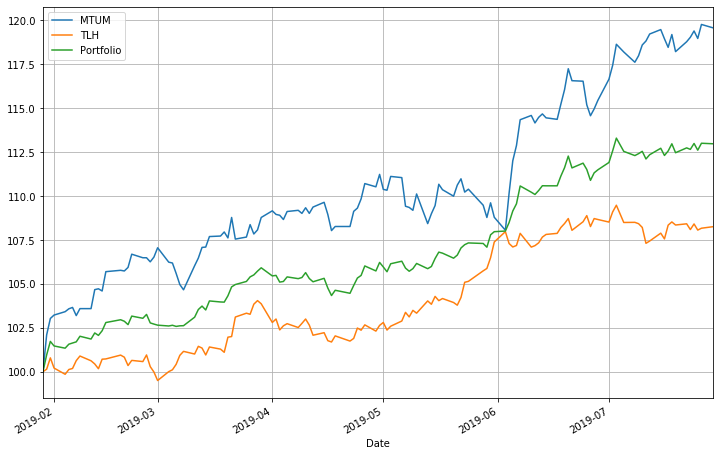

In [4]:
quote.setup_mask(['MTUM', 'TLH'])
quote.graph({'MTUM': 0.417, 'TLH': 0.583})

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.098326,0.144840,-0.299848,0.003659,0.099360,0.202668,0.481846,0.624068,14.061338,1.417828
VONG,122.0,0.126900,0.338401,-0.996346,-0.068403,0.131269,0.327930,1.271199,0.351545,19.411294,7.928632
SPTL,122.0,0.076397,0.236736,-0.591965,-0.061817,0.055302,0.225390,0.743020,0.289186,10.058224,2.930501


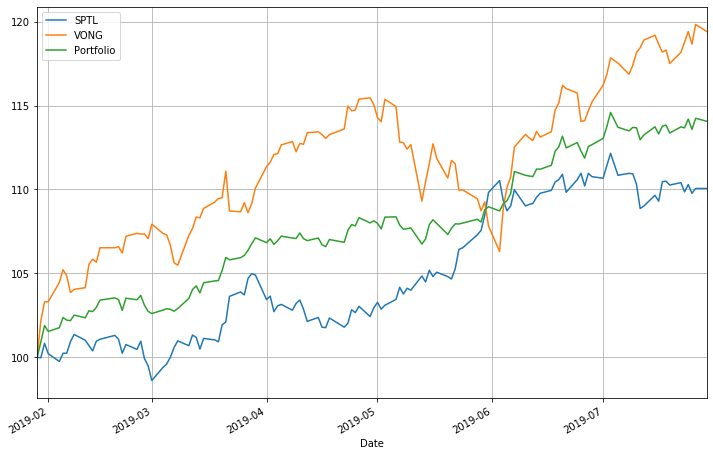

In [5]:
quote.setup_mask(['SPTL', 'VONG'])
quote.graph({'SPTL': 0.572, 'VONG': 0.428})

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.234249,0.407303,-0.930831,-0.034462,0.231896,0.529103,1.358265,0.555638,36.801565,4.555882
SPXL,122.0,0.276805,0.897176,-2.543025,-0.207117,0.303808,0.899403,2.985925,0.299683,47.007152,19.502869
TMF,122.0,0.198632,0.730523,-1.888454,-0.197569,0.154314,0.648541,2.226617,0.261040,27.931288,9.129596


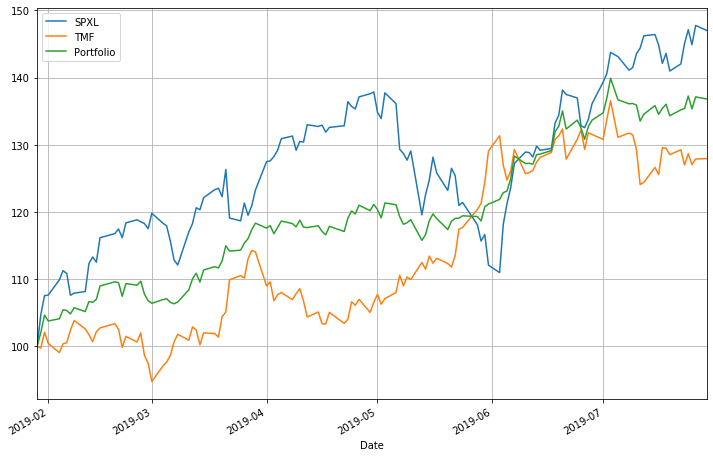

In [6]:
quote.setup_mask(['SPXL', 'TMF'])
quote.graph({'SPXL': 0.465, 'TMF': 0.535})